# Feature Engineering for Strawberry Price Prediction

This notebook demonstrates the feature engineering process for predicting strawberry prices.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from src.fct_eda import *
from src.fct_feature_eng import *
from src.parameter import get_dict_params

## Key Findings

1. Data Cleaning:
   - Removed rows with missing values to ensure data quality
   - Excluded summer period (weeks 24-49) due to lack of price data

2. Temporal Patterns:
   - Strong seasonal effects captured through cyclical encoding
   - Weekly patterns important for short-term predictions

3. Weather Impacts:
   - Temperature and solar radiation show significant correlations
   - Weather interactions provide additional insights

4. Price Dynamics:
   - Price momentum and volatility capture market behavior
   - Relative price features help normalize across seasons

5. Feature Importance:
   - Seasonal indicators among top predictors
   - Weather features show varying importance

## 1. Load and Split Data

In [12]:
# Load data
data = pd.read_csv('data/raw/senior_ds_test.csv')

# Load parameters
dict_params = get_dict_params()
weather_cols = dict_params['weather_cols']

# Split data
train_data, test_data = split_train_test(data)

print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (443, 15)
Testing set shape: (78, 15)


## 2. Analyze Missing Values

In [13]:
# Display missing values before cleaning
print("Missing values before cleaning:")
print(train_data[weather_cols].isnull().sum())

# Clean data by removing rows with missing values
train_clean = handle_missing_values(train_data)
test_clean = handle_missing_values(test_data)

print("\nDataset shapes after cleaning:")
print(f"Training set: {train_clean.shape} (removed {train_data.shape[0] - train_clean.shape[0]} rows)")
print(f"Testing set: {test_clean.shape} (removed {test_data.shape[0] - test_clean.shape[0]} rows)")

Missing values before cleaning:
windspeed           0
temp                0
cloudcover          0
precip              0
solarradiation      0
price             213
dtype: int64

Dataset shapes after cleaning:
Training set: (230, 15) (removed 213 rows)
Testing set: (49, 15) (removed 29 rows)


## 3. Feature Engineering Process

In [14]:
# Process training data
train_processed = preprocessing(train_data, is_training=True)

# Process test data
test_processed = preprocessing(test_data, is_training=False)

/home/briacleguillou/Documents/machine_learning/strawberries_price_prediction/src/fct_feature_eng.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[col] = pd.to_datetime(result[col])
/home/briacleguillou/Documents/machine_learning/strawberries_price_prediction/src/fct_feature_eng.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[col] = pd.to_datetime(result[col])
/home/briacleguillou/Documents/machine_learning/strawberries_price_prediction/src/fct_feature_eng.py:174: SettingWithCopyWar

In [15]:
# Scale features
train_scaled = scale_df(train_processed)
test_scaled = scale_df(test_processed)

In [16]:
# Display date ranges
print("\nTraining data date range:")
print(f"Start: {train_processed['start_date'].min()}, End: {train_processed['start_date'].max()}")
print("\nTesting data date range:")
print(f"Start: {test_processed['start_date'].min()}, End: {test_processed['start_date'].max()}")


Training data date range:
Start: 2013-12-09 00:00:00, End: 2021-12-27 00:00:00

Testing data date range:
Start: 2022-01-03 00:00:00, End: 2023-05-29 00:00:00


## 4. Analyze Generated Features

In [17]:
# Display feature categories
print("Temporal Features:")
temporal_cols = [col for col in train_processed.columns if any(x in col for x in ['year', 'month', 'week', 'season'])]
print(temporal_cols)

print("\nWeather Features:")
weather_cols2 = [col for col in train_processed.columns if any(x in col for x in weather_cols)]
print(weather_cols2)

print("\nPrice Features:")
price_cols = [col for col in train_processed.columns if 'price' in col]
print(price_cols)

Temporal Features:
['year', 'week', 'month', 'season', 'month_sin', 'month_cos', 'week_sin', 'week_cos', 'price_rel_seasonal', 'season_Winter', 'season_Spring', 'season_Summer', 'season_Fall']

Weather Features:
['windspeed', 'temp', 'cloudcover', 'precip', 'solarradiation', 'price_min', 'price_max', 'price', 'windspeed_lag1', 'windspeed_lag2', 'windspeed_lag4', 'windspeed_rolling_mean_4w', 'windspeed_rolling_std_4w', 'windspeed_rolling_max_4w', 'windspeed_rolling_min_4w', 'windspeed_trend', 'temp_lag1', 'temp_lag2', 'temp_lag4', 'temp_rolling_mean_4w', 'temp_rolling_std_4w', 'temp_rolling_max_4w', 'temp_rolling_min_4w', 'temp_trend', 'cloudcover_lag1', 'cloudcover_lag2', 'cloudcover_lag4', 'cloudcover_rolling_mean_4w', 'cloudcover_rolling_std_4w', 'cloudcover_rolling_max_4w', 'cloudcover_rolling_min_4w', 'cloudcover_trend', 'precip_lag1', 'precip_lag2', 'precip_lag4', 'precip_rolling_mean_4w', 'precip_rolling_std_4w', 'precip_rolling_max_4w', 'precip_rolling_min_4w', 'precip_trend', '

## 5. Feature Importance Analysis

In [18]:
train_processed.price

22     3.830
23     4.140
24     3.600
25     1.800
26     2.040
       ...  
412    1.395
413    0.990
440    5.035
441    5.010
442    4.025
Name: price, Length: 210, dtype: float64

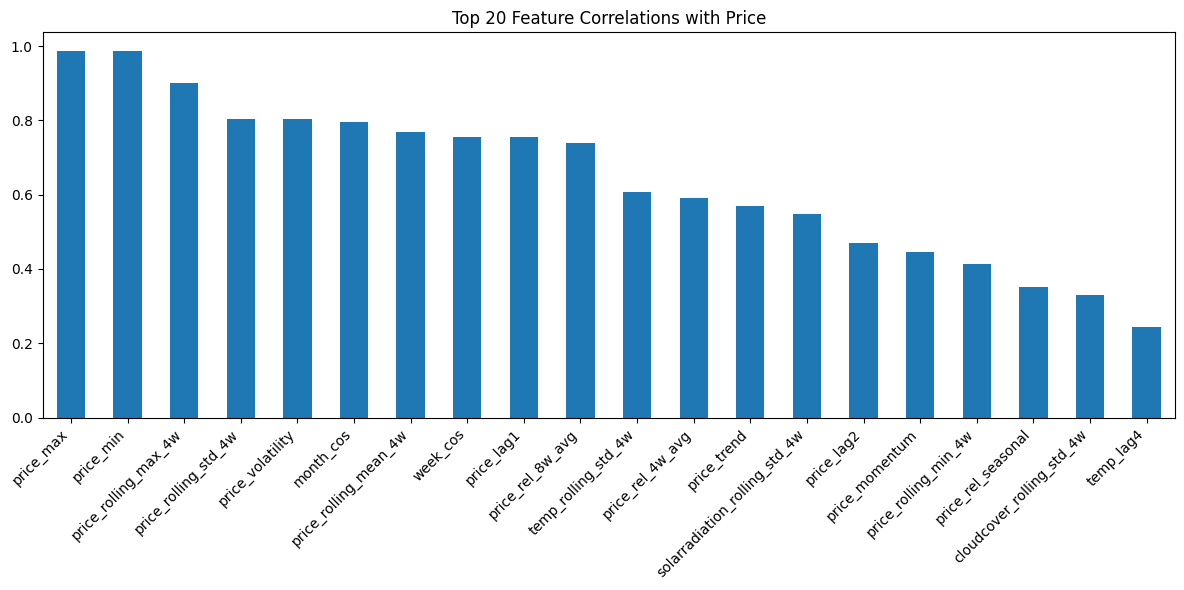

In [19]:
# Calculate correlations with price
correlations = train_processed.select_dtypes(include='float').corr()['price'].sort_values(ascending=False)

# Plot top 20 correlations
plt.figure(figsize=(12, 6))
correlations[1:21].plot(kind='bar')
plt.title('Top 20 Feature Correlations with Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The average price is closely linked to its precedent values, namely price_rolling_max_4w.

## 6. Export Results

In [20]:
train_scaled.to_csv('data/processed/train_scaled.csv')
train_processed.to_csv('data/processed/train_processed.csv')
test_scaled.to_csv('data/processed/test_scaled.csv')
test_processed.to_csv('data/processed/test_processed.csv')